In [160]:
import cv2
import numpy as np
import pandas as pd

In [161]:
videoList = ["VID_20150123_172926_F.mp4.txt",
    "VID_20150123_173259_Q.mp4.txt",
    "VID_20150123_173329_F.mp4.txt",
    "VID_20150123_173358_Q.mp4.txt",
    "VID_20150123_173427_F.mp4.txt",
    "VID_20150123_173457_Q.mp4.txt",
    "VID_20150123_173556_Q.mp4.txt",
    "VID_20150123_173629_F.mp4.txt",
    "VID_20150123_173700_Q.mp4.txt",
    "VID_20150123_173757_Q.mp4.txt",
    "VID_20150123_173028_F.mp4.txt",
    "VID_20150123_172857_Q.mp4.txt"]
fps = 30.323427803

In [162]:
def readFromFile(fileName):
    l =np.loadtxt(fileName)
    return l[0], l[1], l[2]

In [163]:
#will return a list of the indexes of the peaks
def peakList(colorList, frameThreshold):
    peaks = []
    for i in range(1,len(colorList)-1):
        #check to see if greater than immediate surroundings
        if colorList[i-1] <  colorList[i]  and colorList[i+1] <  colorList[i]:
            #if so, check every other frame in the threshold
            for j in range(2, frameThreshold):
                #check everything in threshold before - will break if not a peak
                if i-j>0:
                    if colorList[i]<colorList[i-j]:
                        break
                #check everything in threshold after
                if i+j<len(colorList):
                    if colorList[i]<colorList[i+j]:
                        break
            else:
                peaks.append(i)
    return peaks

In [164]:
def rrList(peakIndexes):
    rrlist = [];
    for i in range(1,len(peakIndexes)):
        rr = (peakIndexes[i]-peakIndexes[i-1])*1/fps
        rrlist.append(rr)
    return rrlist

In [165]:
def timeList(rrList):
    times = [rrList[0]]
    for i in range(1,len(rrList)):
        times.append(times[i-1]+rrList[i])
    return times

In [166]:
thresholds = range(1,31)

In [167]:
def getError(rrList):
    errors = 0
    for rr in rrList:
            if rr<.8 or rr>1.2:
                errors = errors+1
    return errors

In [168]:
# for red...
#this list will hold the total number of errors across all videos, with the total number of errors for each threshold
#being stored at index = threshold-1
#for example, redErrors[0] will hold the total number of errors across all videos when threshold=1
redErrors = [0]*len(thresholds)
for nameIndex in range(0,len(videoList)):
    #for every vid, get red
    r,g,b = readFromFile(videoList[nameIndex])
    i=0;
    while(i <len(thresholds)):
    #for every vid, test each threshold for errors
    #add errors to approprate place on redErrors list
        rrR = rrList(peakList(r,i+1))
        redErrors[i] = redErrors[i]+getError(rrR)
        i= i+1

#get average number of errors per video
for i in range(0,len(redErrors)):
    redErrors[i] = redErrors[i]/12.0

redErrors
   

[66.91666666666667,
 66.91666666666667,
 43.083333333333336,
 30.333333333333332,
 19.75,
 14.25,
 11.5,
 10.833333333333334,
 10.416666666666666,
 10.416666666666666,
 9.583333333333334,
 9.416666666666666,
 9.416666666666666,
 9.0,
 8.833333333333334,
 8.583333333333334,
 8.333333333333334,
 6.916666666666667,
 5.416666666666667,
 3.5,
 2.9166666666666665,
 2.5833333333333335,
 2.5833333333333335,
 2.75,
 2.9166666666666665,
 3.4166666666666665,
 4.25,
 5.583333333333333,
 6.583333333333333,
 6.833333333333333]

In [169]:
#for green
greenErrors = [0]*len(thresholds)
for nameIndex in range(0,len(videoList)):
    #for every vid, get green
    r,g,b = readFromFile(videoList[nameIndex])
    i=0;
    while(i <len(thresholds)):
    #for every vid, test each threshold for errors
    #add errors to approprate place on greenErrors list
        rrG = rrList(peakList(g,i+1))
        greenErrors[i] = greenErrors[i]+getError(rrG)
        i= i+1

#get average number of errors per video
for i in range(0,len(greenErrors)):
    greenErrors[i] = greenErrors[i]/12.0

greenErrors
   

[62.25,
 62.25,
 44.583333333333336,
 33.416666666666664,
 23.5,
 16.416666666666668,
 14.0,
 12.5,
 11.416666666666666,
 10.666666666666666,
 9.916666666666666,
 9.25,
 8.916666666666666,
 8.75,
 8.166666666666666,
 7.916666666666667,
 7.75,
 6.666666666666667,
 4.75,
 2.9166666666666665,
 2.3333333333333335,
 2.1666666666666665,
 1.8333333333333333,
 2.1666666666666665,
 2.3333333333333335,
 2.75,
 3.5,
 4.583333333333333,
 6.416666666666667,
 6.666666666666667]

In [170]:
#for blue
blueErrors = [0]*len(thresholds)
for nameIndex in range(0,len(videoList)):
    #for every vid, get blue
    r,g,b = readFromFile(videoList[nameIndex])
    i=0;
    while(i <len(thresholds)):
    #for every vid, test each threshold for errors
    #add errors to approprate place on blueErrors list
        rrB = rrList(peakList(b,i+1))
        blueErrors[i] = blueErrors[i]+getError(rrB)
        i= i+1

#get average number of errors per video
for i in range(0,len(blueErrors)):
    blueErrors[i] = blueErrors[i]/12.0

blueErrors

[138.91666666666666,
 138.91666666666666,
 90.75,
 69.08333333333333,
 49.666666666666664,
 36.333333333333336,
 27.916666666666668,
 21.5,
 17.75,
 14.25,
 12.583333333333334,
 11.083333333333334,
 10.25,
 9.416666666666666,
 8.916666666666666,
 8.416666666666666,
 7.833333333333333,
 7.25,
 6.25,
 5.0,
 3.9166666666666665,
 3.5833333333333335,
 3.5833333333333335,
 3.5833333333333335,
 3.6666666666666665,
 4.333333333333333,
 5.333333333333333,
 5.75,
 7.0,
 7.0]

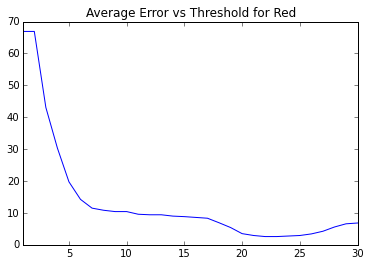

In [171]:
redSeries = pd.Series(redErrors, index=thresholds)
%matplotlib inline
redSeries.plot(title="Average Error vs Threshold for Red")

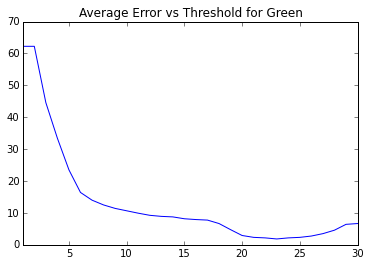

In [172]:
greenSeries = pd.Series(greenErrors, index=thresholds)
%matplotlib inline
greenSeries.plot(title="Average Error vs Threshold for Green")

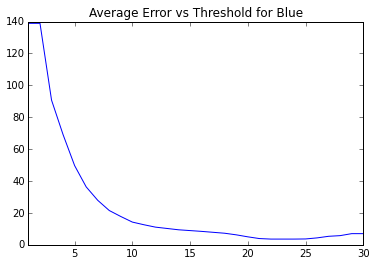

In [173]:
blueSeries = pd.Series(blueErrors, index=thresholds)
%matplotlib inline
blueSeries.plot(title="Average Error vs Threshold for Blue")